In [1]:
import pandas as pd
import joblib
import dataInspectionTools as ditools
#import dataPreprocessingTools as dptools #yet to be implemented

from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

colCat = pd.read_csv('columnCategory.csv')
colCat.rename(columns = {'columns':'columnsName'}, inplace = True)

/var/folders/42/3d9r3rcx2vgd6bmrbmhv51k40000gn/T/ipykernel_1564/2130133617.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
colCat

,Category,columnsName
0,Assesment Data,"['id', 'member_id', 'loan_amnt', 'term', 'home..."
1,Loan Activity data,"['funded_amnt', 'funded_amnt_inv', 'int_rate',..."


## Feature selection
since 18 out of 74 columns are inactive, we will need to drop the inactive columns to deacrease the DataFrame size

In [5]:
colCat[colCat['Category'] == 'Assesment Data'].columnsName[0]

"['id', 'member_id', 'loan_amnt', 'term', 'home_ownership', 'verification_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state', 'dti', 'application_type', 'emp_title', 'emp_length', 'annual_inc', 'desc', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med']"

We see that the list of columns are contained in a string, a conversion function is needed

In [6]:
def convert(lst):
    return eval(lst)

In [7]:
assessmentColumns = convert(colCat[colCat['Category'] == 'Assesment Data'].columnsName[0])
loanActivityColumns = convert(colCat[colCat['Category'] == 'Loan Activity data']['columnsName'].values[0])

print(assessmentColumns[:5])
print(loanActivityColumns[:5])

['id', 'member_id', 'loan_amnt', 'term', 'home_ownership']
['funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'grade']


In [8]:
activeColumns = assessmentColumns + loanActivityColumns
len(activeColumns)

56

So now we have the column list of the active feature

In [9]:
df = df[activeColumns]
df.head()

,id,member_id,loan_amnt,term,home_ownership,verification_status,pymnt_plan,url,purpose,zip_code,...,collection_recovery_fee,last_pymnt_amnt,revol_util,total_acc,last_pymnt_d,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,36 months,RENT,Verified,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,860xx,...,0.00,171.62,83.7,9.0,Jan-15,NaN,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,60 months,RENT,Source Verified,n,https://www.lendingclub.com/browse/loanDetail....,car,309xx,...,1.11,119.66,9.4,4.0,Apr-13,NaN,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,36 months,RENT,Not Verified,n,https://www.lendingclub.com/browse/loanDetail....,small_business,606xx,...,0.00,649.91,98.5,10.0,Jun-14,NaN,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,36 months,RENT,Source Verified,n,https://www.lendingclub.com/browse/loanDetail....,other,917xx,...,0.00,357.48,21.0,37.0,Jan-15,NaN,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,60 months,RENT,Source Verified,n,https://www.lendingclub.com/browse/loanDetail....,other,972xx,...,0.00,67.79,53.9,38.0,Jan-16,NaN,0.0,NaN,NaN,NaN


Now the DataFrame is only containing 56 active columns.

Let's save into csv file to be used on data visualization apps.

In [10]:
df.to_csv('LoanActiveColumnOnly.csv',index=False)

## Descriptive analysis

Firstly we will separate the columns by the data type
- numerical data -> numCols
- object data -> catCols

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   term                         466285 non-null  object 
 4   home_ownership               466285 non-null  object 
 5   verification_status          466285 non-null  object 
 6   pymnt_plan                   466285 non-null  object 
 7   url                          466285 non-null  object 
 8   purpose                      466285 non-null  object 
 9   zip_code                     466285 non-null  object 
 10  addr_state                   466285 non-null  object 
 11  dti                          466285 non-null  float64
 12  application_type             466285 non-null  object 
 13 

it seems 56 feature is too long to be displayed

In [12]:
numCols, catCols = ditools.getNumericalCategorical(df)
print('Numerical Columns contained',str(len(numCols)),'columns')
print('Categorical Columns contained',str(len(catCols)),'columns')

Numerical Columns contained 34 columns
Categorical Columns contained 22 columns


In [13]:
df[numCols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   dti                          466285 non-null  float64
 4   annual_inc                   466281 non-null  float64
 5   delinq_2yrs                  466256 non-null  float64
 6   inq_last_6mths               466256 non-null  float64
 7   mths_since_last_delinq       215934 non-null  float64
 8   mths_since_last_record       62638 non-null   float64
 9   open_acc                     466256 non-null  float64
 10  pub_rec                      466256 non-null  float64
 11  collections_12_mths_ex_med   466140 non-null  float64
 12  funded_amnt                  466285 non-null  int64  
 13 

In [14]:
df[catCols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   home_ownership       466285 non-null  object
 1   pymnt_plan           466285 non-null  object
 2   verification_status  466285 non-null  object
 3   zip_code             466285 non-null  object
 4   next_pymnt_d         239071 non-null  object
 5   sub_grade            466285 non-null  object
 6   addr_state           466285 non-null  object
 7   url                  466285 non-null  object
 8   earliest_cr_line     466256 non-null  object
 9   application_type     466285 non-null  object
 10  title                466265 non-null  object
 11  last_pymnt_d         465909 non-null  object
 12  emp_length           445277 non-null  object
 13  issue_d              466285 non-null  object
 14  emp_title            438697 non-null  object
 15  term                 466285 non-nu

now we see that the function we used are correct

### Numerical Data 

In [15]:
df.describe()

,id,member_id,loan_amnt,dti,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,revol_util,total_acc,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,4.662810e+05,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,...,466285.000000,466285.000000,466285.000000,465945.000000,466256.000000,98974.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,1.307973e+07,1.459766e+07,14317.277577,17.218758,7.327738e+04,0.284678,0.804745,34.104430,74.306012,11.187069,...,85.344211,8.961534,3123.913796,56.176947,25.064430,42.852547,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,1.089371e+07,1.168237e+07,8286.509164,7.851121,5.496357e+04,0.797365,1.091598,21.778487,30.357653,4.987526,...,552.216084,85.491437,5554.737393,23.732628,11.600141,21.662591,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,5.473400e+04,7.047300e+04,500.000000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.639987e+06,4.379705e+06,8000.000000,11.360000,4.500000e+04,0.000000,0.000000,16.000000,53.000000,8.000000,...,0.000000,0.000000,312.620000,39.200000,17.000000,26.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,1.010790e+07,1.194108e+07,12000.000000,16.870000,6.300000e+04,0.000000,0.000000,31.000000,76.000000,10.000000,...,0.000000,0.000000,545.960000,57.600000,23.000000,42.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,2.073121e+07,2.300154e+07,20000.000000,22.780000,8.896000e+04,0.000000,1.000000,49.000000,102.000000,14.000000,...,0.000000,0.000000,3187.510000,74.700000,32.000000,59.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,3.809811e+07,4.086083e+07,35000.000000,39.990000,7.500000e+06,29.000000,33.000000,188.000000,129.000000,84.000000,...,33520.270000,7002.190000,36234.440000,892.300000,156.000000,188.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


We can see some of the descriptive analytics for the data but it seems not to be displayed greatly, we might want to see the distribution for the data.

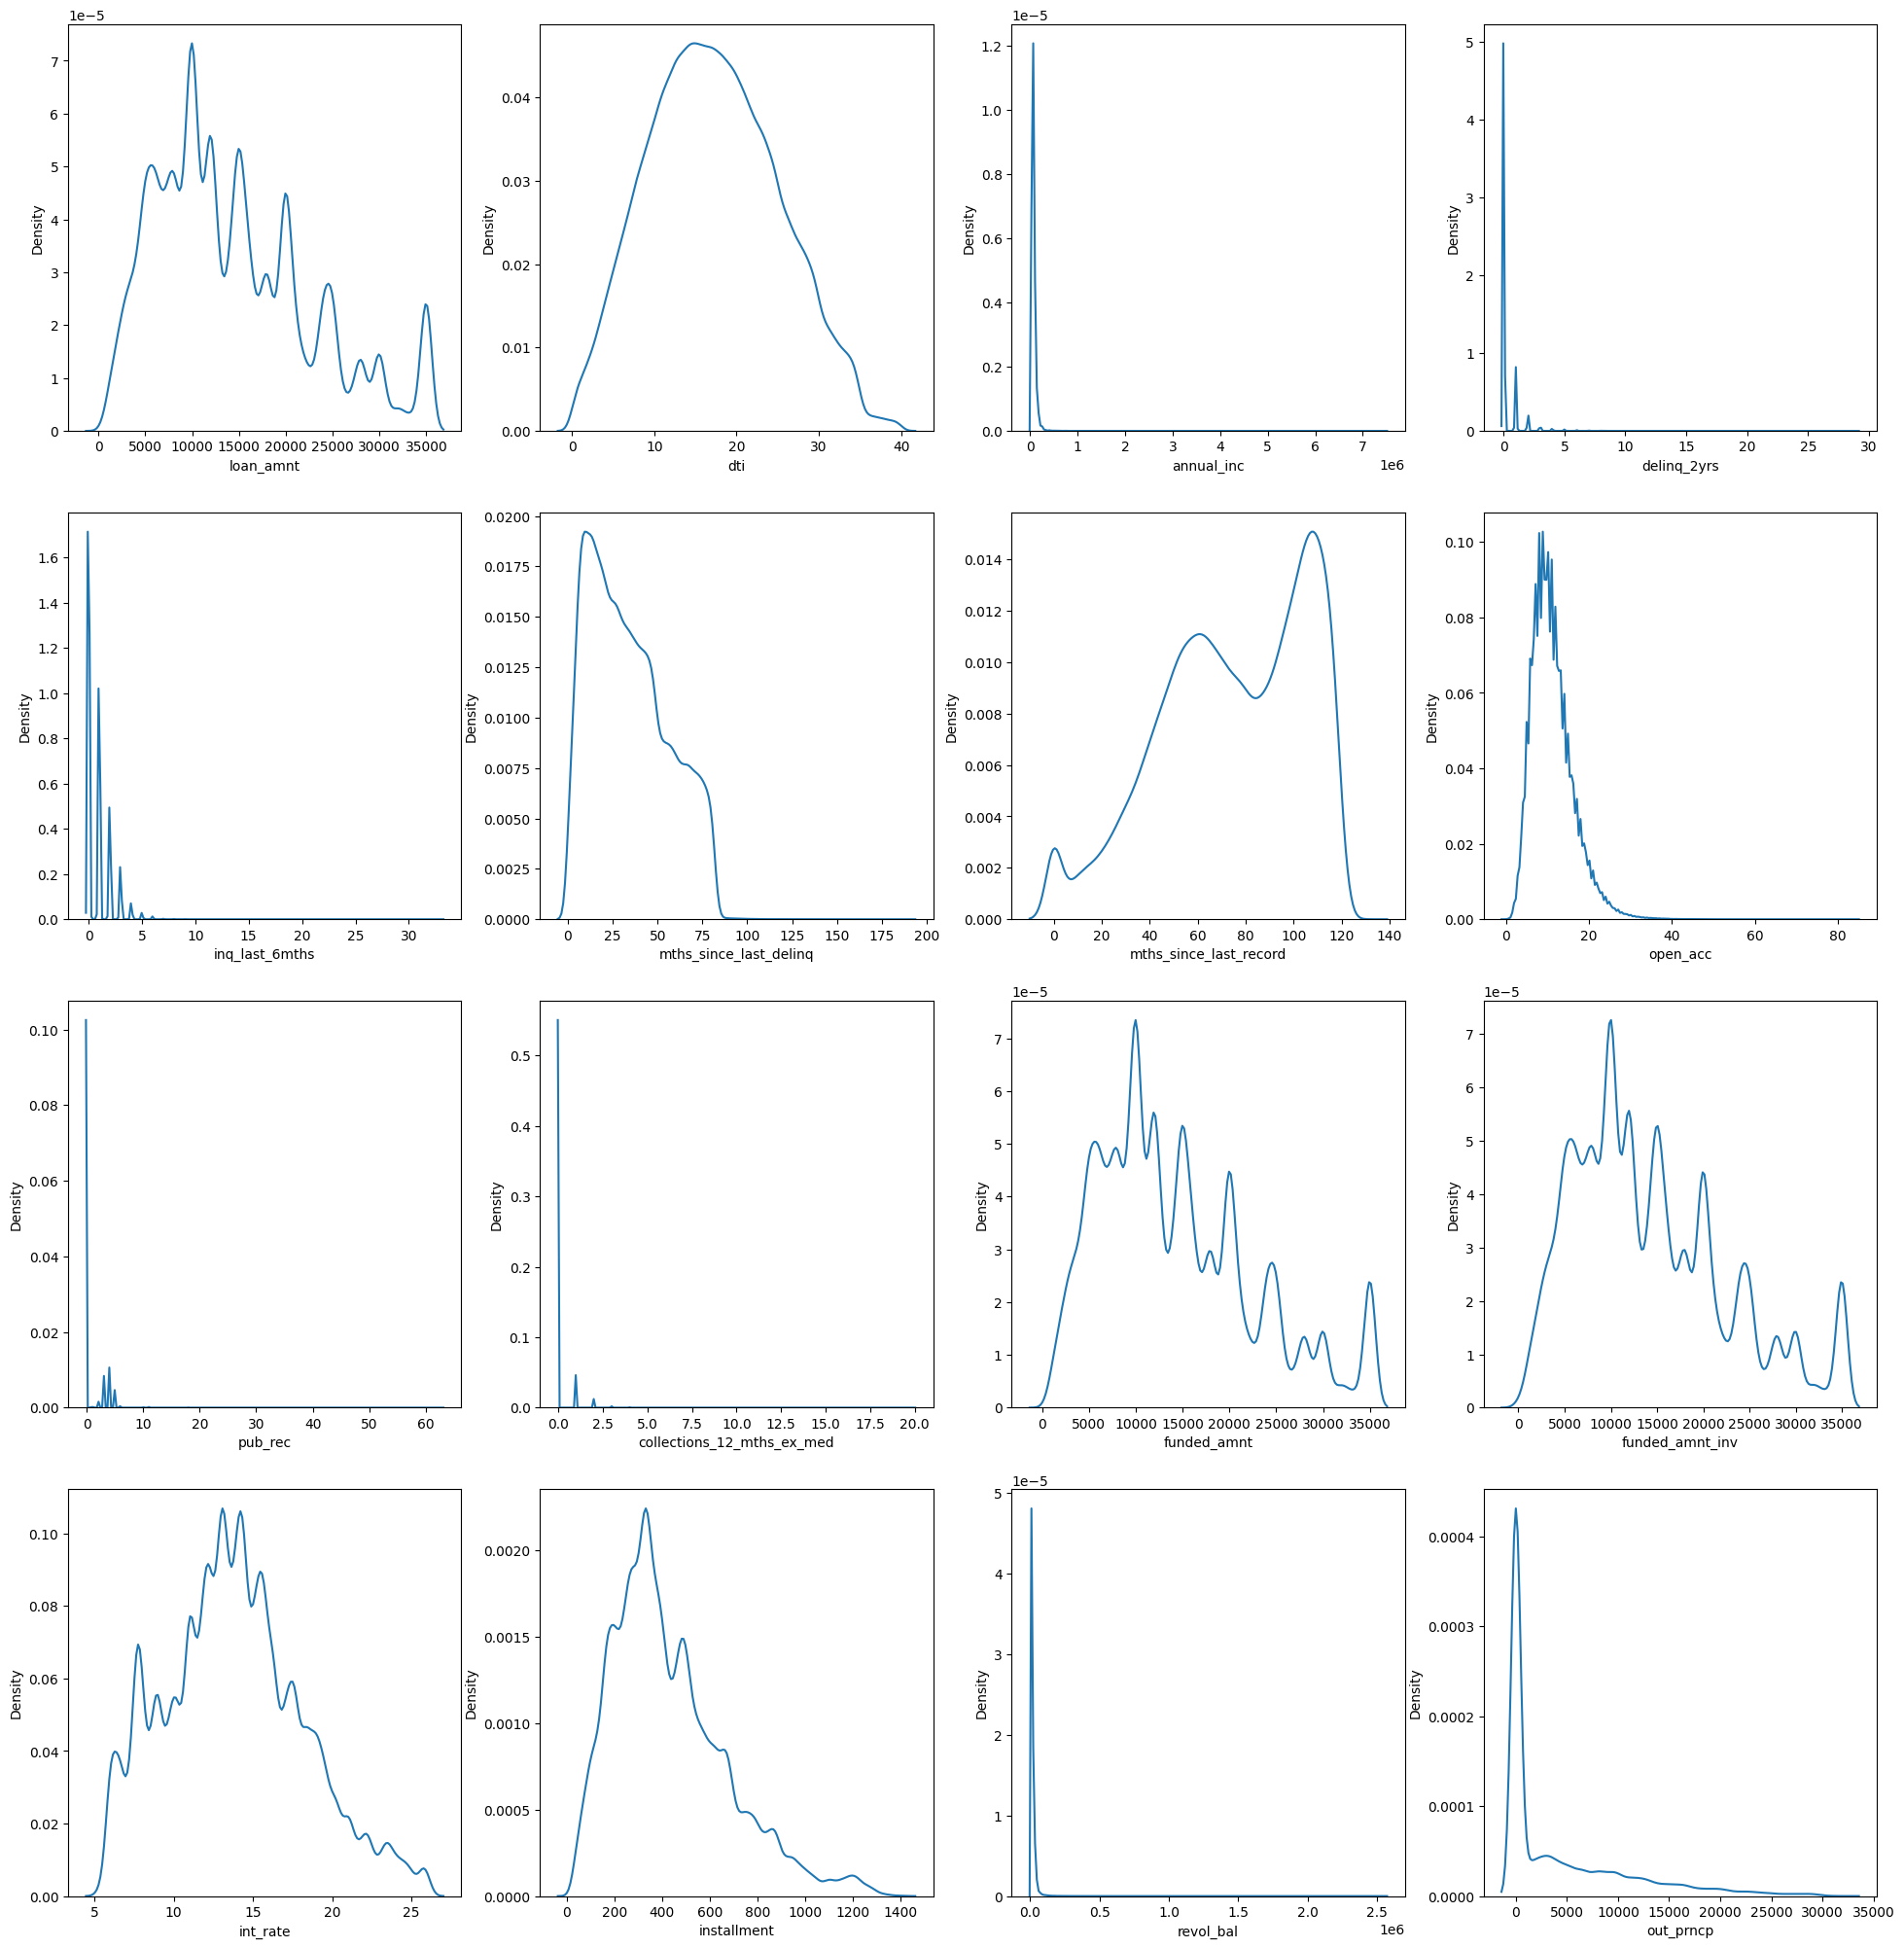

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(24,25))

columns = 4
rows = 4


for i in range(16):
    fig.add_subplot(rows, columns, i+1)
    sns.kdeplot(data=df, x=numCols[i+2])  
plt.show()


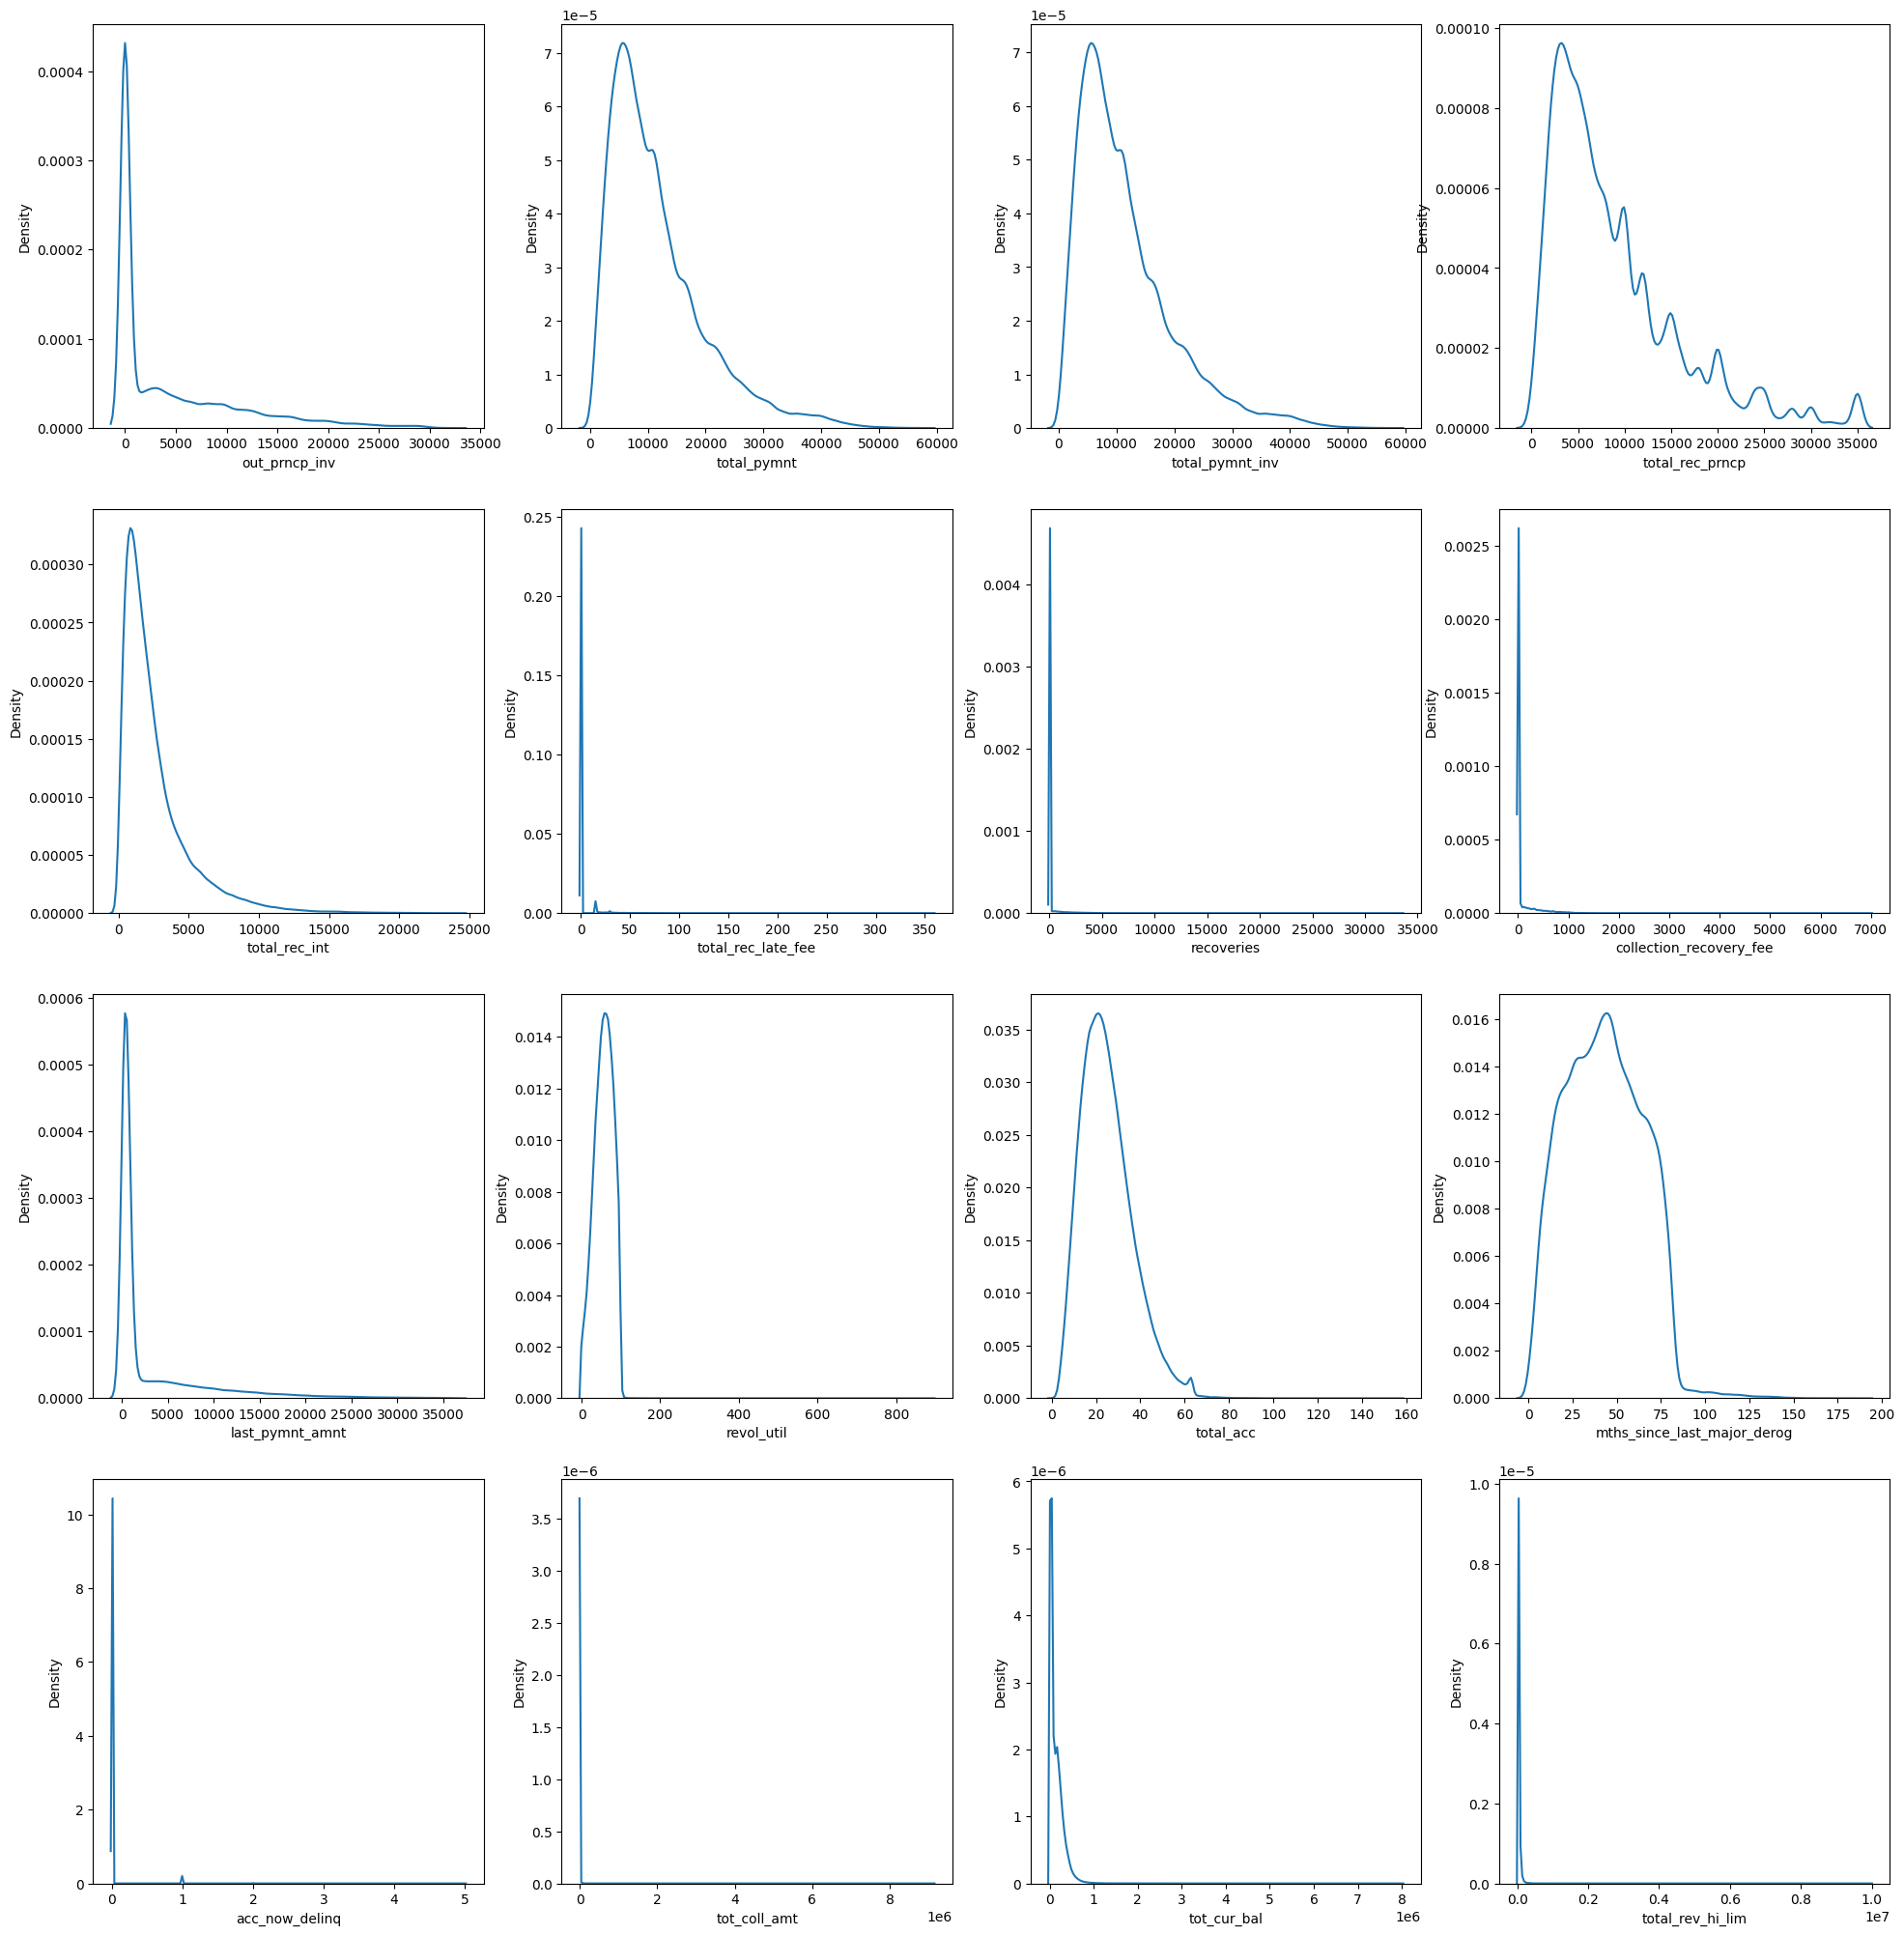

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(24,25))

columns = 4
rows = 4


for i in range(16):
    fig.add_subplot(rows, columns, i+1)
    sns.kdeplot(data=df, x=numCols[i+18])  
plt.show()


<b>Notes: </b>
- it seems that most of the columns distribution are right-skewed (positive skew). This indicates that there are a high value occurs but rare compare the smaller value within the column.

### Categorical Data

Firstly we want to see the how many category in a column. There might be a case such as in column "desc" and "url" not to be a categorical data rather a non-numerical data

In [18]:
for cols in catCols:
    print('------',cols,'------')
    print(cols,'containing',str(df[cols].nunique()),'unique values')
    print('')

------ home_ownership ------
home_ownership containing 6 unique values

------ pymnt_plan ------
pymnt_plan containing 2 unique values

------ verification_status ------
verification_status containing 3 unique values

------ zip_code ------
zip_code containing 888 unique values

------ next_pymnt_d ------
next_pymnt_d containing 100 unique values

------ sub_grade ------
sub_grade containing 35 unique values

------ addr_state ------
addr_state containing 50 unique values

------ url ------
url containing 466285 unique values

------ earliest_cr_line ------
earliest_cr_line containing 664 unique values

------ application_type ------
application_type containing 1 unique values

------ title ------
title containing 63099 unique values

------ last_pymnt_d ------
last_pymnt_d containing 98 unique values

------ emp_length ------
emp_length containing 11 unique values

------ issue_d ------
issue_d containing 91 unique values

------ emp_title ------
emp_title containing 205475 unique val

<b> Notes: </b>
- it seems as the most categorical unique value is 14 by the column of "loan_type"
- there is also geographical data contained in "addr_state" and "zip_code"
- there is also date input in which will not be utilized

Now let's make a filter for categorical data with 14 and less unique values

In [19]:
CategoricalColumns = []

for cols in catCols:
    length = df[cols].nunique()
    if length <= 14:
        print('------',cols,'------')
        print(cols,'containing',str(length),'unique values')
        print('')
        CategoricalColumns.append(cols)

------ home_ownership ------
home_ownership containing 6 unique values

------ pymnt_plan ------
pymnt_plan containing 2 unique values

------ verification_status ------
verification_status containing 3 unique values

------ application_type ------
application_type containing 1 unique values

------ emp_length ------
emp_length containing 11 unique values

------ term ------
term containing 2 unique values

------ purpose ------
purpose containing 14 unique values

------ initial_list_status ------
initial_list_status containing 2 unique values

------ grade ------
grade containing 7 unique values

------ loan_status ------
loan_status containing 9 unique values



In [20]:
print('CategoricalColumns consists of',str(len(CategoricalColumns)),'columns')
print(CategoricalColumns)

CategoricalColumns consists of 10 columns
['home_ownership', 'pymnt_plan', 'verification_status', 'application_type', 'emp_length', 'term', 'purpose', 'initial_list_status', 'grade', 'loan_status']


now let's see the distribution for each categorical data

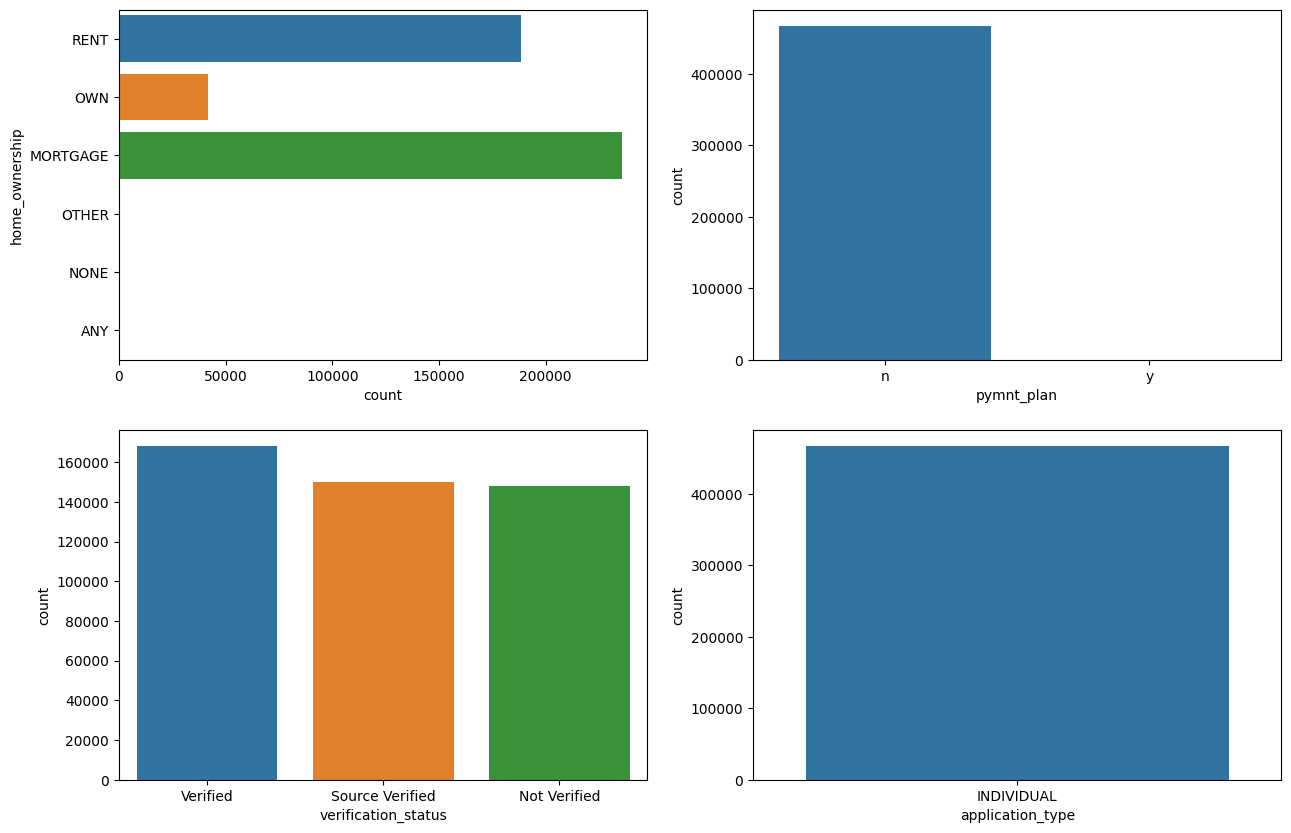

In [21]:
fig = plt.figure(figsize=(15,10))

columns = 2
rows = 2

for i in range(4):
    fig.add_subplot(rows, columns, i+1)
    if df[CategoricalColumns[i]].nunique() >5:
        sns.countplot(data=df, y=CategoricalColumns[i])
    else:
        sns.countplot(data=df, x=CategoricalColumns[i])
plt.show()


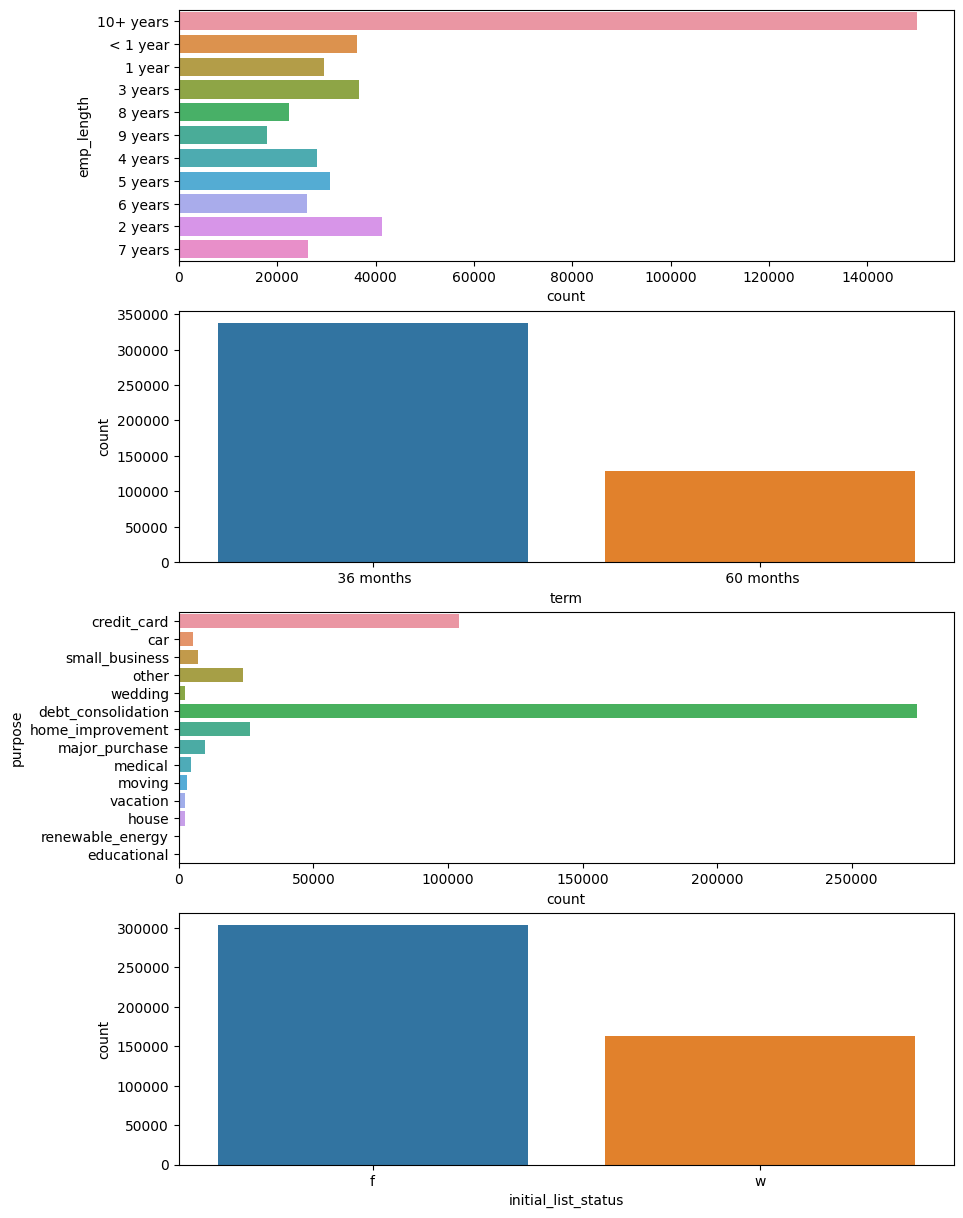

In [22]:
fig = plt.figure(figsize=(10,15))

columns = 1
rows = 4

for i in range(4):
    fig.add_subplot(rows, columns, i+1)
    if df[CategoricalColumns[i+4]].nunique() >5:
        sns.countplot(data=df, y=CategoricalColumns[i+4])
    else:
        sns.countplot(data=df, x=CategoricalColumns[i+4])
plt.show()


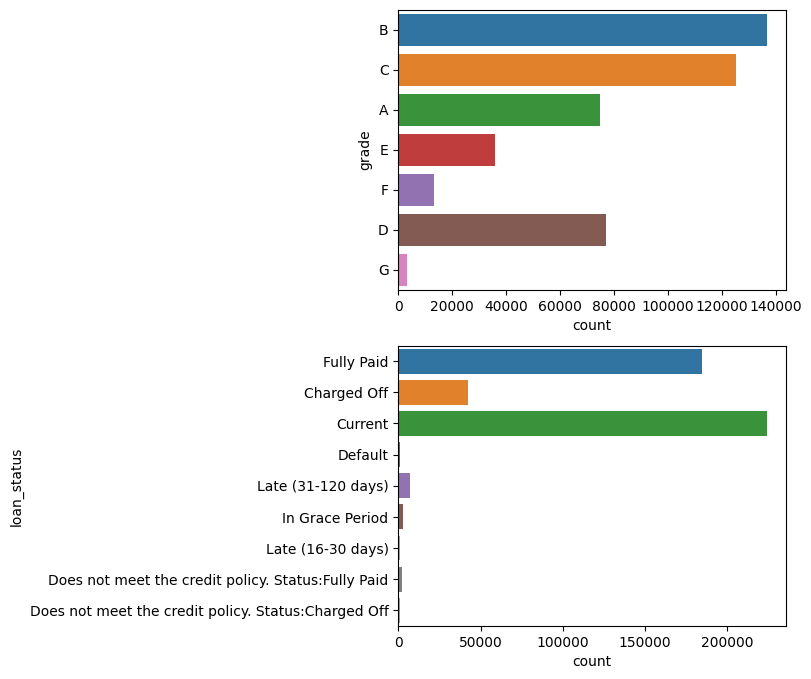

In [23]:
fig = plt.figure(figsize=(5,8))

columns = 1
rows = 2

for i in range(2):
    fig.add_subplot(rows, columns, i+1)
    if df[CategoricalColumns[i+8]].nunique() >5:
        sns.countplot(data=df, y=CategoricalColumns[i+8])
    else:
        sns.countplot(data=df, x=CategoricalColumns[i+8])
plt.show()


<b> Notes: </b>
- It seems that application_type only have 1 input we will consider this as an inactive column.
- loan status can help to determine if the loan is a good or bad loan
- pymnt_plan only consist a few with y values, it better for it to be dropped

In [24]:
df = df.drop(columns=['pymnt_plan'])

### target transformation
The target value will be taken from <b>loan_status</b> column. Later the target will be transformed into a binary column to indicate whether the loan is good or bad.

<Axes: xlabel='count', ylabel='loan_status'>

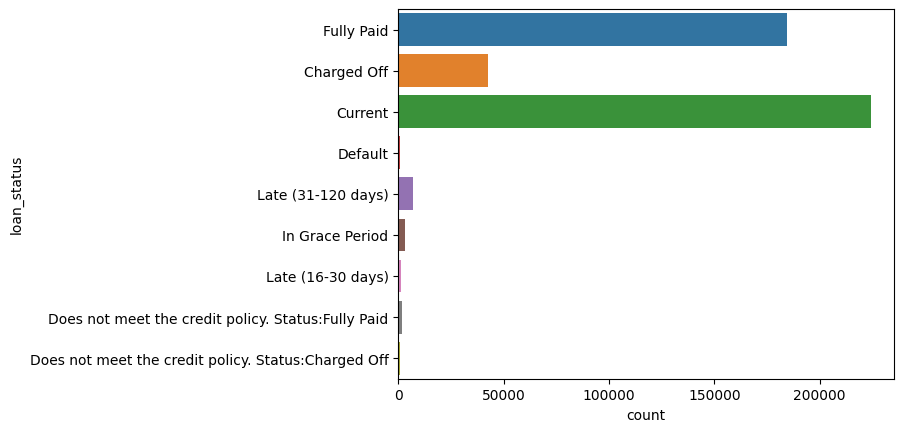

In [25]:
sns.countplot(data=df, y='loan_status')

<b>Notes:</b>
- now we see that we can make the category of good or bad to be strict or not based on the day period of lateness. let's give a bad score to those whose status are late after in grace period.
- we can make the target as good indicator or good indicator. We will create 2 columns for target which will be used in different training.

In [26]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [27]:
# This indicates a bad loan. Something we want to predict
bad_indicator = df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off'])
df['bad_indicator'] = bad_indicator

good_indicator = df['loan_status'].isin(['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid'])
df['good_indicator'] = good_indicator

df['bad_indicator'] = df["bad_indicator"].astype(int)
df['good_indicator'] = df["good_indicator"].astype(int)

targetFeature = ['bad_indicator', 'good_indicator']

print(bad_indicator.value_counts())
print(good_indicator.value_counts())

False    414099
True      52186
Name: loan_status, dtype: int64
True     414099
False     52186
Name: loan_status, dtype: int64


### Feature selection finalization

As the final step for the feature selection, we will eliminate all columns that wont be used.

What are the feature that will be used:
- Only using assessment data
- categorical with less than 15 class in its column (stored at variable CategoricalColumns)
- numerical non identifier (id, member_id)
- target columns

In [28]:
AssessmentCategorical = list(set(CategoricalColumns) & set(assessmentColumns))
#as per note on categorical columns that 'application_type' only consists with 1 value, we will drop it
AssessmentCategorical.remove('application_type')
print(AssessmentCategorical)

['purpose', 'emp_length', 'home_ownership', 'pymnt_plan', 'verification_status', 'term']


In [29]:
AssessmentNumerical = list(set(numCols) & set(assessmentColumns))
#dropping identifier columns
AssessmentNumerical.remove('id')
AssessmentNumerical.remove('member_id')

print(AssessmentNumerical)

['delinq_2yrs', 'mths_since_last_delinq', 'loan_amnt', 'inq_last_6mths', 'dti', 'open_acc', 'collections_12_mths_ex_med', 'pub_rec', 'annual_inc', 'mths_since_last_record']


In [30]:
selectedFeatures = AssessmentNumerical + AssessmentCategorical + targetFeature
#dropping pymnt_plan
selectedFeatures.remove('pymnt_plan')
print(selectedFeatures)

['delinq_2yrs', 'mths_since_last_delinq', 'loan_amnt', 'inq_last_6mths', 'dti', 'open_acc', 'collections_12_mths_ex_med', 'pub_rec', 'annual_inc', 'mths_since_last_record', 'purpose', 'emp_length', 'home_ownership', 'verification_status', 'term', 'bad_indicator', 'good_indicator']


In [31]:
df_selected = df[selectedFeatures]
df_selected

,delinq_2yrs,mths_since_last_delinq,loan_amnt,inq_last_6mths,dti,open_acc,collections_12_mths_ex_med,pub_rec,annual_inc,mths_since_last_record,purpose,emp_length,home_ownership,verification_status,term,bad_indicator,good_indicator
0,0.0,NaN,5000,1.0,27.65,3.0,0.0,0.0,24000.0,NaN,credit_card,10+ years,RENT,Verified,36 months,0,1
1,0.0,NaN,2500,5.0,1.00,3.0,0.0,0.0,30000.0,NaN,car,< 1 year,RENT,Source Verified,60 months,1,0
2,0.0,NaN,2400,2.0,8.72,2.0,0.0,0.0,12252.0,NaN,small_business,10+ years,RENT,Not Verified,36 months,0,1
3,0.0,35.0,10000,1.0,20.00,10.0,0.0,0.0,49200.0,NaN,other,10+ years,RENT,Source Verified,36 months,0,1
4,0.0,38.0,3000,0.0,17.94,15.0,0.0,0.0,80000.0,NaN,other,1 year,RENT,Source Verified,60 months,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.0,NaN,18400,2.0,19.85,18.0,0.0,0.0,110000.0,NaN,debt_consolidation,4 years,MORTGAGE,Source Verified,60 months,0,1
466281,0.0,NaN,22000,5.0,18.45,18.0,0.0,1.0,78000.0,116.0,debt_consolidation,10+ years,MORTGAGE,Verified,60 months,1,0
466282,0.0,65.0,20700,2.0,25.65,18.0,0.0,0.0,46000.0,NaN,debt_consolidation,7 years,MORTGAGE,Verified,60 months,0,1
466283,3.0,13.0,2000,1.0,5.39,21.0,0.0,0.0,83000.0,NaN,credit_card,3 years,OWN,Verified,36 months,0,1


## Data preprocessing

### Duplicate data
We want to check if the data consist of any duplicate data

In [32]:
df_selected.duplicated().sum()

0

Since there is no duplicate data, no action needed in this step

## Missing data
Next we continue on missing data. as in previous phase we acknoledge that there are some missing data with some column haing more than 70% of missing data.

In [33]:
missings_columns, a = ditools.missing_info(df_selected)
missings_columns.sort_values('percent_missing', ascending=False)

,column_name,missing_count,percent_missing
9,mths_since_last_record,403647,86.566585
1,mths_since_last_delinq,250351,53.690554
11,emp_length,21008,4.505399
6,collections_12_mths_ex_med,145,0.031097
0,delinq_2yrs,29,0.006219
3,inq_last_6mths,29,0.006219
5,open_acc,29,0.006219
7,pub_rec,29,0.006219
8,annual_inc,4,0.000858
4,dti,0,0.000000


Let's focus on top 2 missing columns. 
<br><br>
> The early hypothesis is that the missing value can be imputed using default number, this case 0


After examining further if we put 0 on the null values it rather shows that currently the user have record (0 month since last record). An alternative way is to bin the category into:
- less than 3 months
- less than 6 months
- less than 12 months
- more than 12 months, and 
- No records

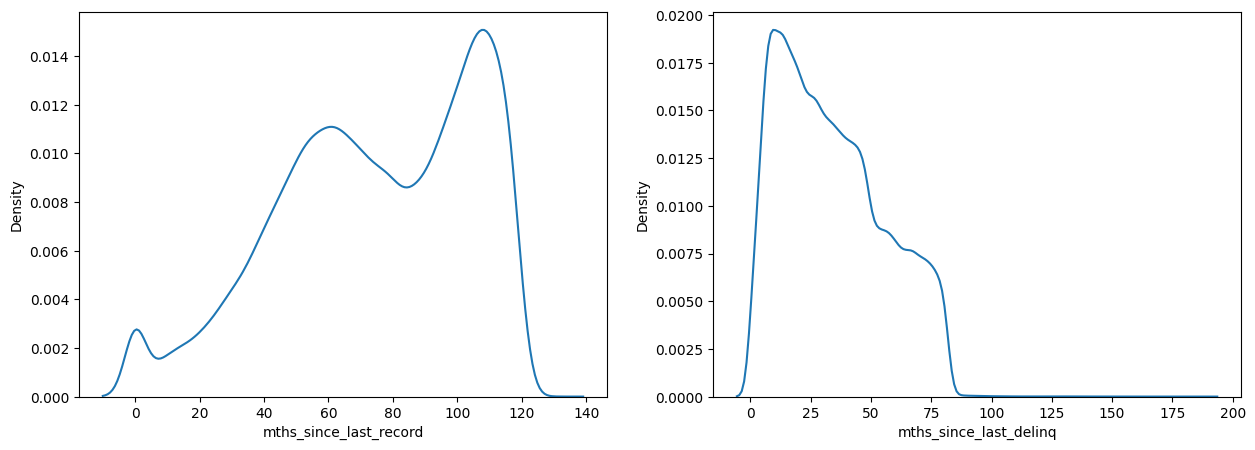

In [34]:
fig = plt.figure(figsize=(15,5))

columns = 2
rows = 1

fig.add_subplot(rows, columns, 1)
sns.kdeplot(data=df_selected, x='mths_since_last_record')

fig.add_subplot(rows, columns, 2)
sns.kdeplot(data=df_selected, x='mths_since_last_delinq')

plt.show()

Let's see the max values in these 2 columns

In [35]:
df[['mths_since_last_record', 'mths_since_last_delinq']].describe()

,mths_since_last_record,mths_since_last_delinq
count,62638.000000,215934.000000
mean,74.306012,34.104430
std,30.357653,21.778487
min,0.000000,0.000000
25%,53.000000,16.000000
50%,76.000000,31.000000
75%,102.000000,49.000000
max,129.000000,188.000000


Let's set the date into under 3 months, under 6 months, under 1,5,10 year(s), more than 10 years , and No record

this will create a categorical without adding too much class in the bins but will still recognize the early activity

In [36]:
bins = [0,3,6,12,60,120, float("inf")]
labels = ['under 3 Months', 'under 6 months', 'under a year', 'under 5 year', 'under 10 years', 'more than 10 years']

df_selected['last_record'] = pd.cut(df_selected['mths_since_last_record'],
                                      bins=bins, 
                                      labels=labels, 
                                      include_lowest= True).astype(str)

df_selected.loc[df_selected['mths_since_last_record'].isna(), 'last_record'] = 'No record'

/var/folders/42/3d9r3rcx2vgd6bmrbmhv51k40000gn/T/ipykernel_1564/1720749091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['last_record'] = pd.cut(df_selected['mths_since_last_record'],


before we proceed we need to recheck the result of the binning

In [37]:
df_selected[df_selected['mths_since_last_record'].isna()][['mths_since_last_record','last_record']].head()

,mths_since_last_record,last_record
0,NaN,No record
1,NaN,No record
2,NaN,No record
3,NaN,No record
4,NaN,No record


In [38]:
df_selected[df_selected['mths_since_last_record']>120][['mths_since_last_record','last_record']].head()

,mths_since_last_record,last_record
39283,129.0,more than 10 years
49210,121.0,more than 10 years
462657,121.0,more than 10 years


In [39]:
df_selected[df_selected['mths_since_last_record']<3][['mths_since_last_record','last_record']].head()

,mths_since_last_record,last_record
35075,0.0,under 3 Months
35127,0.0,under 3 Months
35431,0.0,under 3 Months
38512,0.0,under 3 Months
38786,0.0,under 3 Months


Now it's good to go to implement it to delinquency column

In [40]:
df_selected['last_delinq'] = pd.cut(df_selected['mths_since_last_delinq'],
                                      bins=bins, 
                                      labels=labels, 
                                      include_lowest= True).astype(str)

df_selected.loc[df_selected['mths_since_last_delinq'].isna(), 'last_delinq'] = 'No record'

/var/folders/42/3d9r3rcx2vgd6bmrbmhv51k40000gn/T/ipykernel_1564/1328270356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['last_delinq'] = pd.cut(df_selected['mths_since_last_delinq'],


In [41]:
print(df_selected[df_selected['mths_since_last_delinq'].isna()][['mths_since_last_delinq','last_delinq']].head())

print(df_selected[df_selected['mths_since_last_delinq']>120][['mths_since_last_delinq','last_delinq']].head())

print(df_selected[df_selected['mths_since_last_delinq']<3][['mths_since_last_delinq','last_delinq']].head())

   mths_since_last_delinq last_delinq
0                     NaN   No record
1                     NaN   No record
2                     NaN   No record
5                     NaN   No record
6                     NaN   No record
       mths_since_last_delinq         last_delinq
47267                   135.0  more than 10 years
59880                   122.0  more than 10 years
69293                   146.0  more than 10 years
72223                   134.0  more than 10 years
88550                   122.0  more than 10 years
      mths_since_last_delinq     last_delinq
337                      2.0  under 3 Months
661                      2.0  under 3 Months
662                      2.0  under 3 Months
890                      2.0  under 3 Months
1670                     2.0  under 3 Months


In [42]:
#check if there is any missing value in the binned column
print(df_selected['last_record'].isna().sum())
print(df_selected['last_delinq'].isna().sum())

0
0


now we can drop the original column

In [43]:
df_selected.drop(columns=['mths_since_last_delinq', 'mths_since_last_record'],inplace=True)

/var/folders/42/3d9r3rcx2vgd6bmrbmhv51k40000gn/T/ipykernel_1564/1498104482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop(columns=['mths_since_last_delinq', 'mths_since_last_record'],inplace=True)


now let's move on to another missing column data

In [44]:
missings_columns[missings_columns['percent_missing']>0].sort_values('percent_missing',ascending=False)

,column_name,missing_count,percent_missing
9,mths_since_last_record,403647,86.566585
1,mths_since_last_delinq,250351,53.690554
11,emp_length,21008,4.505399
6,collections_12_mths_ex_med,145,0.031097
0,delinq_2yrs,29,0.006219
3,inq_last_6mths,29,0.006219
5,open_acc,29,0.006219
7,pub_rec,29,0.006219
8,annual_inc,4,0.000858


<b>Notes:</b>
- based on the column desription collections_12_mths_ex_med, inq_last_6mths, open_acc, pub_rec, delinq_2yrs can be assumed to have default number 0 beacuse it might be no data for the columns or 0 activity for its column
- emp_length and annual_inc need a further investigation


In [45]:
df_selected[['collections_12_mths_ex_med', 'inq_last_6mths', 'open_acc', 'pub_rec', 'delinq_2yrs']] = df_selected[['collections_12_mths_ex_med', 'inq_last_6mths', 'open_acc', 'pub_rec', 'delinq_2yrs']].fillna(0) 

/var/folders/42/3d9r3rcx2vgd6bmrbmhv51k40000gn/T/ipykernel_1564/3040522152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[['collections_12_mths_ex_med', 'inq_last_6mths', 'open_acc', 'pub_rec', 'delinq_2yrs']] = df_selected[['collections_12_mths_ex_med', 'inq_last_6mths', 'open_acc', 'pub_rec', 'delinq_2yrs']].fillna(0)


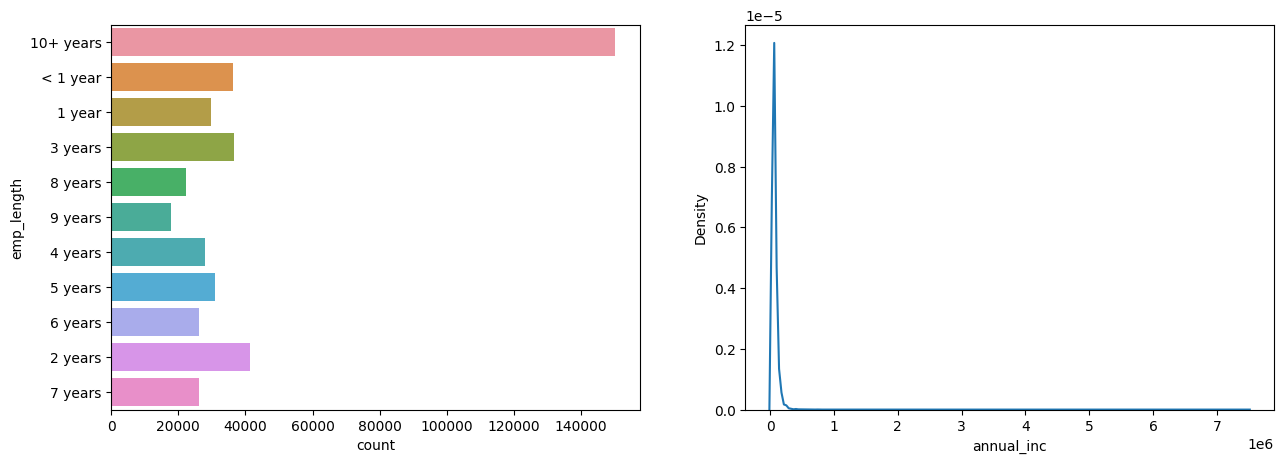

In [46]:
fig = plt.figure(figsize=(15,5))

columns = 2
rows = 1

fig.add_subplot(rows, columns, 1)
sns.countplot(data=df_selected, y='emp_length')

fig.add_subplot(rows, columns, 2)
sns.kdeplot(data=df_selected, x='annual_inc')

plt.show()



<b>Notes:</b>
- This needs confirmation to the business process but some credit are allows borrower without jobs so therefore we can makes a new category for 'No employment'
- the emp_length seems to have too many classes and can be narrowed down into  1 year and under, 3 year and under, 5 year and under, under 10 years, 10 years and more, and no employment
- it might be inconclusive to have assumption for missing data imputation for annual_inc since it's only have 4 missing data, we can drop the missing

In [47]:
df['emp_length'].value_counts()

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

In [48]:
emp_len_rearrange = {
    '< 1 year': '1 year and under',
    '1 year': '1 year and under',
    '2 years': '3 years and under',
    '3 years': '3 years and under',
    '4 years': '5 years and under',
    '5 years': '5 years and under',
    '6 years': 'under 10 years',
    '7 years': 'under 10 years',
    '8 years': 'under 10 years',
    '9 years': 'under 10 years',
    '10+ years':'10 years and more',
    }

df_selected['new_emp_length'] = df_selected['emp_length'].map(emp_len_rearrange)

/var/folders/42/3d9r3rcx2vgd6bmrbmhv51k40000gn/T/ipykernel_1564/1715895753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['new_emp_length'] = df_selected['emp_length'].map(emp_len_rearrange)


Let's compare the distribution

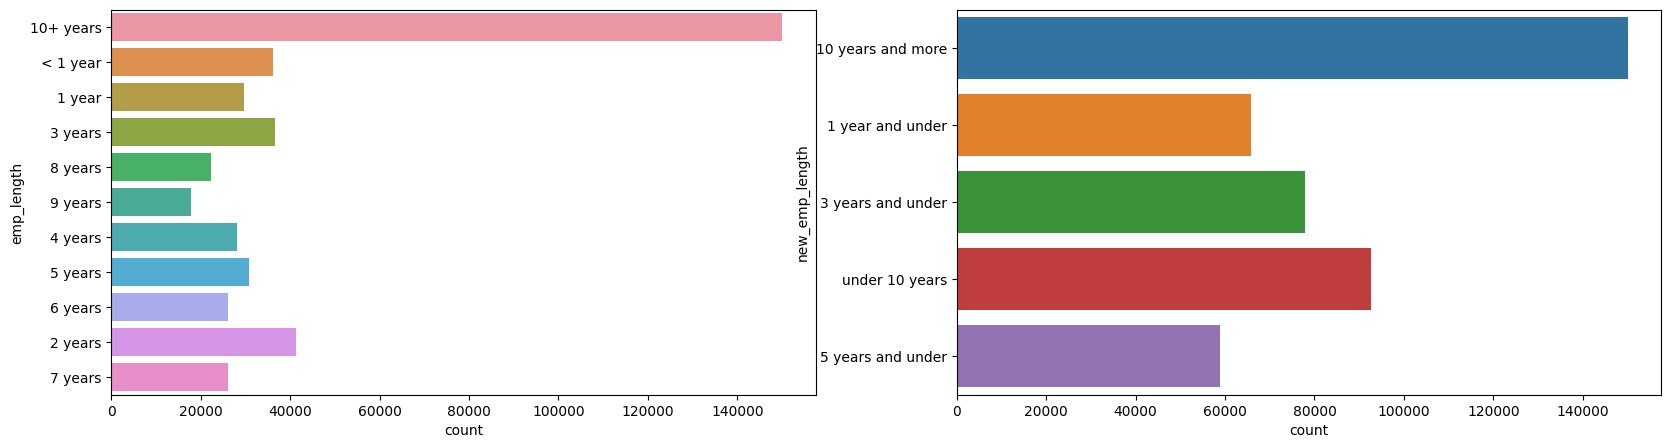

In [49]:
fig = plt.figure(figsize=(20,5))

columns = 2
rows = 1

fig.add_subplot(rows, columns, 1)
sns.countplot(data=df_selected, y='emp_length')

fig.add_subplot(rows, columns, 2)
sns.countplot(data=df_selected, y='new_emp_length')

plt.show()



Now let's add the no employment into the new column

<Axes: xlabel='count', ylabel='new_emp_length'>

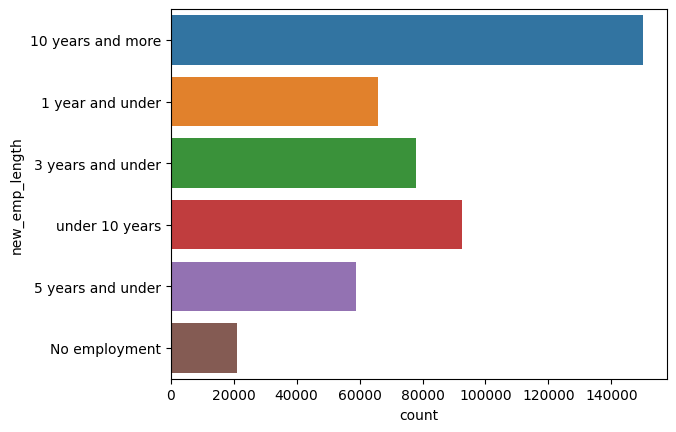

In [50]:
df_selected.loc[df_selected['emp_length'].isna(), 'new_emp_length'] = 'No employment'
sns.countplot(data=df_selected, y='new_emp_length')

To finalize now we will drop the old emp_length column and rename the new one

In [51]:
df_selected.drop(columns=['emp_length'],inplace=True)
df_selected.rename(columns = {'new_emp_length':'emp_length'}, inplace = True)

/var/folders/42/3d9r3rcx2vgd6bmrbmhv51k40000gn/T/ipykernel_1564/2987191651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop(columns=['emp_length'],inplace=True)
/var/folders/42/3d9r3rcx2vgd6bmrbmhv51k40000gn/T/ipykernel_1564/2987191651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns = {'new_emp_length':'emp_length'}, inplace = True)


Now to drop the missing value form annual_inc

In [52]:
df_selected.dropna(subset = ['annual_inc'], inplace=True)

/var/folders/42/3d9r3rcx2vgd6bmrbmhv51k40000gn/T/ipykernel_1564/4052119049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(subset = ['annual_inc'], inplace=True)


Now let's see the missing statistics in our current DataFrame

In [53]:
new_missing_cols, a = ditools.missing_info(df_selected)
new_missing_cols.sort_values('percent_missing', ascending=False)

,column_name,missing_count,percent_missing
0,delinq_2yrs,0,0.0
9,home_ownership,0,0.0
15,last_delinq,0,0.0
14,last_record,0,0.0
13,good_indicator,0,0.0
12,bad_indicator,0,0.0
11,term,0,0.0
10,verification_status,0,0.0
8,purpose,0,0.0
1,loan_amnt,0,0.0


Now all the missing values are handled

## Outliers handling
This part we want to handle outliers that exist within the data. note that some outliers should be retained to helps the model on recognizing anomaly within the data.

First let's acquire numerical data from our current DataFrame

In [54]:
currentNumerical, currentCategorical = ditools.getNumericalCategorical(df_selected)
print(currentNumerical)
print(currentCategorical)

['delinq_2yrs', 'loan_amnt', 'inq_last_6mths', 'dti', 'open_acc', 'collections_12_mths_ex_med', 'pub_rec', 'annual_inc', 'bad_indicator', 'good_indicator']
['purpose', 'emp_length', 'home_ownership', 'last_record', 'verification_status', 'last_delinq', 'term']


it seems our target ('bad_indicator', 'good_indicator') are included in the numerical column, we need to drop it.

In [55]:
currentNumerical.remove('bad_indicator')
currentNumerical.remove('good_indicator')
print(currentNumerical)

['delinq_2yrs', 'loan_amnt', 'inq_last_6mths', 'dti', 'open_acc', 'collections_12_mths_ex_med', 'pub_rec', 'annual_inc']


Now let's see the boxplot for each column

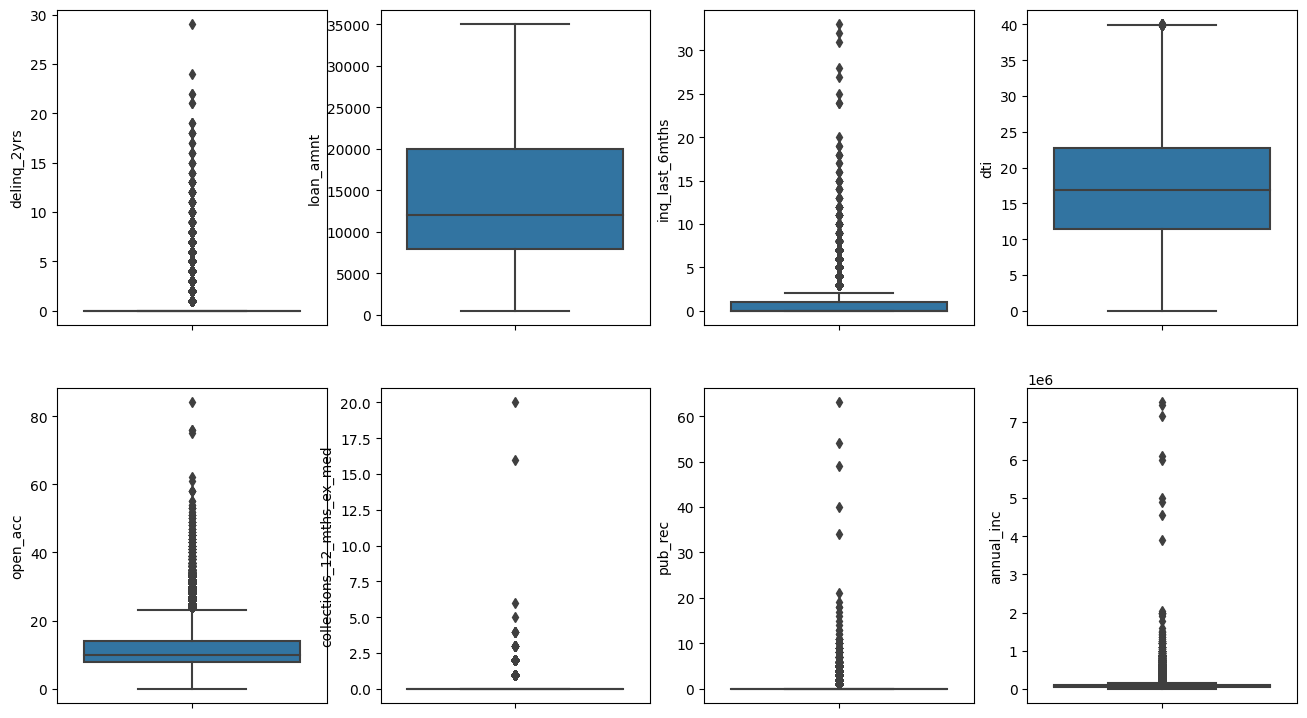

In [56]:
fig = plt.figure(figsize=(16,9))

columns = 4
rows = 2

for i in range(8):
    fig.add_subplot(rows, columns, i+1)
    sns.boxplot(y=df_selected[currentNumerical[i]], orient="v")

plt.show()

based on observation, columns without the potential of having outliers are loan_amnt and dti while the others seems to have outliers values. Let's check using a function

In [57]:
def count_outliers(dataframe, column, multiplier=1.5):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)

    outliers = len(dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)])

    return outliers

In [58]:
sizeOfdfSelected = len(df_selected)

for cols in currentNumerical:
    outliers = count_outliers(df_selected, cols)
    print('----',cols,'----')
    print(cols,'having',str(outliers),'outliers out of',str(sizeOfdfSelected),'(',str((outliers/sizeOfdfSelected *100)),'%)')

---- delinq_2yrs ----
delinq_2yrs having 83302 outliers out of 466281 ( 17.86519287725642 %)
---- loan_amnt ----
loan_amnt having 0 outliers out of 466281 ( 0.0 %)
---- inq_last_6mths ----
inq_last_6mths having 36785 outliers out of 466281 ( 7.889019711289973 %)
---- dti ----
dti having 43 outliers out of 466281 ( 0.009221906961681904 %)
---- open_acc ----
open_acc having 10440 outliers out of 466281 ( 2.2389932251153275 %)
---- collections_12_mths_ex_med ----
collections_12_mths_ex_med having 3914 outliers out of 466281 ( 0.8394079964656507 %)
---- pub_rec ----
pub_rec having 61363 outliers out of 466281 ( 13.160090160225272 %)
---- annual_inc ----
annual_inc having 19899 outliers out of 466281 ( 4.26759829373275 %)


<b>Notes:</b>
- the amount of outliers here are quite small except for pub_rec and delinq_2yrs
- all the outliers are higher than the upper bounds which showcasing that the distribution is right skewed
- with the data right-skewed, we want our data to be able to recognize the anomalies in this case high value in each column


### Decision:
> ### by the summary from notes, it might be the best for us to preserve the outlier values therefore no action taken in outliers handling

## Scaling and Normalization
in this step we will apply scaling and normalization based on the necessity, so we need to see more on the definiton for each feature


In [59]:
currentNumerical

['delinq_2yrs',
 'loan_amnt',
 'inq_last_6mths',
 'dti',
 'open_acc',
 'collections_12_mths_ex_med',
 'pub_rec',
 'annual_inc']

In [60]:
df_selected[currentNumerical].describe()

,delinq_2yrs,loan_amnt,inq_last_6mths,dti,open_acc,collections_12_mths_ex_med,pub_rec,annual_inc
count,466281.000000,466281.000000,466281.000000,466281.000000,466281.000000,466281.000000,466281.000000,4.662810e+05
mean,0.284663,14317.346353,0.804701,17.218891,11.186469,0.009083,0.160556,7.327738e+04
std,0.797346,8286.511128,1.091585,7.851023,4.988065,0.108632,0.510850,5.496357e+04
min,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.896000e+03
25%,0.000000,8000.000000,0.000000,11.360000,8.000000,0.000000,0.000000,4.500000e+04
50%,0.000000,12000.000000,0.000000,16.870000,10.000000,0.000000,0.000000,6.300000e+04
75%,0.000000,20000.000000,1.000000,22.780000,14.000000,0.000000,0.000000,8.896000e+04
max,29.000000,35000.000000,33.000000,39.990000,84.000000,20.000000,63.000000,7.500000e+06


<b>Notes:</b>
- There are counts table that do not need any scaling/normalization such as pub_rec, delinq_2yrs, collections_12_mths_ex_med, inq_last_6mths
- on open_acc, scaling could be implemented but as it is a count table and the data range is 0-84, no scaling is necessary
- for dti feature as it is a ratio and ranging from 0-39.9, it suggests that the values are already on a relatively similar scale and cover a limited range. In this case, the need for scaling becomes less critical.
- loan_amnt and anual_inc are large and vary significantly, scaling the feature will be necessary
- since some algorithm will performs better with scaled feature, scaling process can be input as hyperparameter tuning step


Let's make a function for scaling

In [61]:
def scale_features(df, columns):
    # Create a copy of the selected columns
    df_ = df[columns].copy()

    # Initialize the scaler
    scaler = StandardScaler()
    scaler.fit(df_.values)

    # Fit and transform the selected columns
    StandardScaler().fit(df_.values)
    scaled_features = scaler.transform(df_.values)

    return scaled_features, scaler

def save_scaler(scaler, scaler_name='scaler.bin'):
    joblib.dump(scaler, scaler_name, compress=True)

In [62]:
featureToScale = ['loan_amnt', 'annual_inc']

scaled_features, scaler = scale_features(df_selected, featureToScale)
save_scaler(scaler)

In [63]:
print(scaled_features)

[[-1.12440039 -0.89654721]
 [-1.42609584 -0.78738388]
 [-1.43816366 -1.11028902]
 ...
 [ 0.77024702 -0.49628165]
 [-1.48643493  0.17689224]
 [-0.5210095  -0.49628165]]


In [64]:
df_selected[featureToScale] = scaled_features

/var/folders/42/3d9r3rcx2vgd6bmrbmhv51k40000gn/T/ipykernel_1564/3006350604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[featureToScale] = scaled_features


In [65]:
df_selected

,delinq_2yrs,loan_amnt,inq_last_6mths,dti,open_acc,collections_12_mths_ex_med,pub_rec,annual_inc,purpose,home_ownership,verification_status,term,bad_indicator,good_indicator,last_record,last_delinq,emp_length
0,0.0,-1.124400,1.0,27.65,3.0,0.0,0.0,-0.896547,credit_card,RENT,Verified,36 months,0,1,No record,No record,10 years and more
1,0.0,-1.426096,5.0,1.00,3.0,0.0,0.0,-0.787384,car,RENT,Source Verified,60 months,1,0,No record,No record,1 year and under
2,0.0,-1.438164,2.0,8.72,2.0,0.0,0.0,-1.110289,small_business,RENT,Not Verified,36 months,0,1,No record,No record,10 years and more
3,0.0,-0.521009,1.0,20.00,10.0,0.0,0.0,-0.438061,other,RENT,Source Verified,36 months,0,1,No record,under 5 year,10 years and more
4,0.0,-1.365757,0.0,17.94,15.0,0.0,0.0,0.122311,other,RENT,Source Verified,60 months,0,1,No record,under 5 year,1 year and under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.0,0.492687,2.0,19.85,18.0,0.0,0.0,0.668127,debt_consolidation,MORTGAGE,Source Verified,60 months,0,1,No record,No record,5 years and under
466281,0.0,0.927129,5.0,18.45,18.0,0.0,1.0,0.085923,debt_consolidation,MORTGAGE,Verified,60 months,1,0,under 10 years,No record,10 years and more
466282,0.0,0.770247,2.0,25.65,18.0,0.0,0.0,-0.496282,debt_consolidation,MORTGAGE,Verified,60 months,0,1,No record,under 10 years,under 10 years
466283,3.0,-1.486435,1.0,5.39,21.0,0.0,0.0,0.176892,credit_card,OWN,Verified,36 months,0,1,No record,under 5 year,3 years and under


## Encoding

In [66]:
currentCategorical

['purpose',
 'emp_length',
 'home_ownership',
 'last_record',
 'verification_status',
 'last_delinq',
 'term']

In [67]:
sum = 0
for cols in currentCategorical:
    sum += df_selected[cols].nunique()
print('columns after one hot encoding:',str(sum+len(currentNumerical)))

columns after one hot encoding: 53


In [68]:
encoded_df = pd.get_dummies(df_selected, columns=currentCategorical)

encoded_df

,delinq_2yrs,loan_amnt,inq_last_6mths,dti,open_acc,collections_12_mths_ex_med,pub_rec,annual_inc,bad_indicator,good_indicator,...,verification_status_Verified,last_delinq_No record,last_delinq_more than 10 years,last_delinq_under 10 years,last_delinq_under 3 Months,last_delinq_under 5 year,last_delinq_under 6 months,last_delinq_under a year,term_ 36 months,term_ 60 months
0,0.0,-1.124400,1.0,27.65,3.0,0.0,0.0,-0.896547,0,1,...,1,1,0,0,0,0,0,0,1,0
1,0.0,-1.426096,5.0,1.00,3.0,0.0,0.0,-0.787384,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,-1.438164,2.0,8.72,2.0,0.0,0.0,-1.110289,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0.0,-0.521009,1.0,20.00,10.0,0.0,0.0,-0.438061,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0.0,-1.365757,0.0,17.94,15.0,0.0,0.0,0.122311,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.0,0.492687,2.0,19.85,18.0,0.0,0.0,0.668127,0,1,...,0,1,0,0,0,0,0,0,0,1
466281,0.0,0.927129,5.0,18.45,18.0,0.0,1.0,0.085923,1,0,...,1,1,0,0,0,0,0,0,0,1
466282,0.0,0.770247,2.0,25.65,18.0,0.0,0.0,-0.496282,0,1,...,1,0,0,1,0,0,0,0,0,1
466283,3.0,-1.486435,1.0,5.39,21.0,0.0,0.0,0.176892,0,1,...,1,0,0,0,0,1,0,0,1,0


In [69]:
encoded_df.head()

,delinq_2yrs,loan_amnt,inq_last_6mths,dti,open_acc,collections_12_mths_ex_med,pub_rec,annual_inc,bad_indicator,good_indicator,...,verification_status_Verified,last_delinq_No record,last_delinq_more than 10 years,last_delinq_under 10 years,last_delinq_under 3 Months,last_delinq_under 5 year,last_delinq_under 6 months,last_delinq_under a year,term_ 36 months,term_ 60 months
0,0.0,-1.124400,1.0,27.65,3.0,0.0,0.0,-0.896547,0,1,...,1,1,0,0,0,0,0,0,1,0
1,0.0,-1.426096,5.0,1.00,3.0,0.0,0.0,-0.787384,1,0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,-1.438164,2.0,8.72,2.0,0.0,0.0,-1.110289,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0.0,-0.521009,1.0,20.00,10.0,0.0,0.0,-0.438061,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0.0,-1.365757,0.0,17.94,15.0,0.0,0.0,0.122311,0,1,...,0,0,0,0,0,1,0,0,0,1


In [70]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466281 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   delinq_2yrs                          466281 non-null  float64
 1   loan_amnt                            466281 non-null  float64
 2   inq_last_6mths                       466281 non-null  float64
 3   dti                                  466281 non-null  float64
 4   open_acc                             466281 non-null  float64
 5   collections_12_mths_ex_med           466281 non-null  float64
 6   pub_rec                              466281 non-null  float64
 7   annual_inc                           466281 non-null  float64
 8   bad_indicator                        466281 non-null  int64  
 9   good_indicator                       466281 non-null  int64  
 10  purpose_car                          466281 non-null  uint8  
 11  purpose_credi

In [71]:
encoded_df.to_csv('preprocessedData.csv',index=False)